# Maps of Measured and Calculated Hysteresis

Various maps of OLR hysteresis: 

- absolute clear sky OLR hysteresis 
- fractional clear sky OLR hysteresis 
- calculated clear sky OLR hysteresis
- difference between calculated and measured clear sky OLR hysteresis
- absolute all sky hysteresis
- fractional all sky hysteresis

### Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from matplotlib import cm

### Import Calculated Heights file from Cluster

In [2]:
path = "./Data/"

ts_2m = xr.open_dataset(path + "ts_2m.nc", decode_times=False)
temp = xr.open_dataset(path + "temp.nc", decode_times=False)
olrs = xr.open_dataset(path + "olrs_ltmm.nc", decode_times=False)
heights_calc_raw = xr.open_dataset(path + "heights_calculated.nc", decode_times=False)
heights_meas_raw = xr.open_dataset(path + "heights_measured.nc", decode_times=False)
heights_calc_allsky = xr.open_dataset(
    "./Data/heights_calculated_allsky.nc", decode_times=False
)


lats = temp.lat.values
lons = temp.lon.values
lon_long = temp.lon.values

heights_frac = np.zeros((len(lats), len(lons)))
heights_frac, lons = add_cyclic_point(heights_frac, coord=lons)
lons = temp.lon.values

heights_frac_allsky = np.zeros((len(lats), len(lons)))
heights_frac_allsky, lon_long = add_cyclic_point(heights_frac_allsky, coord=lon_long)

heights_calc = np.zeros((len(lats), len(lons)))
heights_calc, lons = add_cyclic_point(heights_calc, coord=lons)
lons = temp.lon.values

heights_meas = np.zeros((len(lats), len(lons)))
heights_meas, lons = add_cyclic_point(heights_meas, coord=lons)
lons = temp.lon.values

for i in range(len(lats)):
    for j in range(len(lons)):
        heights_frac[i, j] = (
            heights_meas_raw.height.values[i, j]
            * 100
            / olrs.sel(lat=lats[i], lon=lons[j]).olr.values[0]
        )
        heights_frac_allsky[i, j] = (
            heights_calc_allsky.height.values[i, j]
            * 100
            / olrs.sel(lat=lats[i], lon=lons[j]).olr.values[0]
        )
        heights_calc[i, j] = heights_calc_raw.sel(
            lat=lats[i], lon=lons[j]
        ).height.values[()]
        heights_meas[i, j] = heights_meas_raw.sel(
            lat=lats[i], lon=lons[j]
        ).height.values[()]

heights_calc[:, len(lons)] = heights_calc[:, 0]
# heights_calc = np.flip(heights_calc, axis=0)

heights_meas[:, len(lons)] = heights_meas[:, 0]

### Plotting Observed Hysteresis

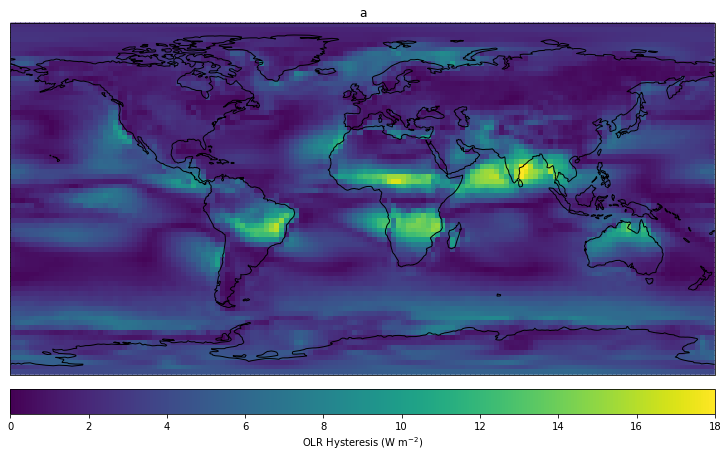

In [3]:
widths = [1]
fig = plt.figure(figsize=(10, 7), constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(
    lon_long, lats, heights_meas_raw.height.values, transform=ccrs.PlateCarree()
)
C1.set_clim(vmin=0, vmax=18)
ax1.set_title("a")
fig.colorbar(
    C1,
    ax=ax1,
    label="OLR Hysteresis (W m$^{-2}$)",
    fraction=0.3,
    orientation="horizontal",
)

path = "./Figures/"
# plt.savefig('Calculated Hysteresis single.png', bbox_inches='tight')

### Fractional Hysteresis

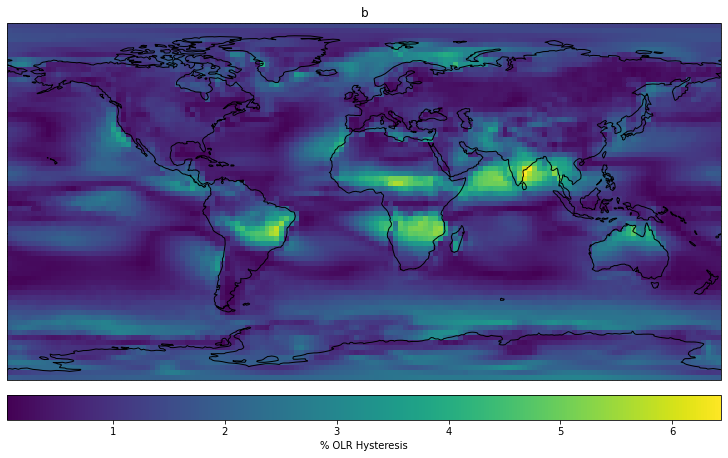

In [4]:
widths = [1]
fig = plt.figure(figsize=(10, 7), constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(lon_long, lats, heights_frac, transform=ccrs.PlateCarree())
ax1.set_title("b")
fig.colorbar(
    C1, ax=ax1, label="% OLR Hysteresis", fraction=0.3, orientation="horizontal"
)

path = "./Figures/"
# plt.savefig(path + 'Fractional Calculated Hysteresis single.png', bbox_inches='tight')

### Calculated Hysteresis

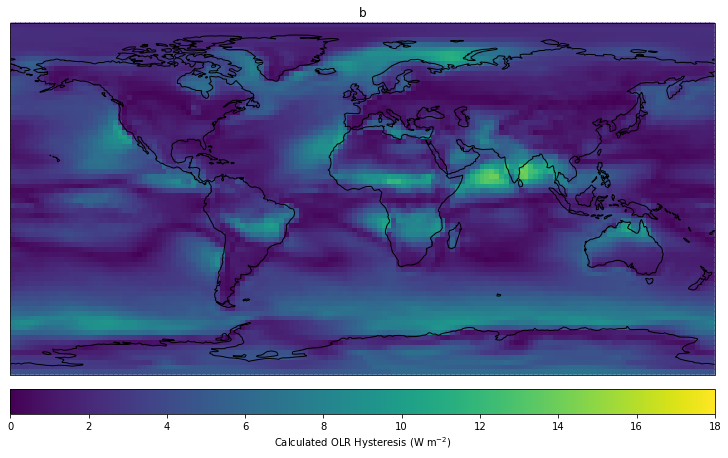

In [5]:
widths = [1, 1]
fig = plt.figure(figsize=(10, 7), constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1)

ax2 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax2.coastlines()
C2 = ax2.pcolor(
    lon_long,
    lats,
    np.flip(heights_calc_raw.height.values, axis=0),
    transform=ccrs.PlateCarree(),
)
C2.set_clim(vmin=0, vmax=18)
ax2.set_title("b")
fig.colorbar(
    C2,
    ax=ax2,
    label="Calculated OLR Hysteresis (W m$^{-2}$)",
    fraction=0.3,
    orientation="horizontal",
)

path = "./Figures/"
# plt.savefig(path + 'Calc Hysteresis.png', bbox_inches='tight')

### Difference Between Calculated and Measured Hysteresis

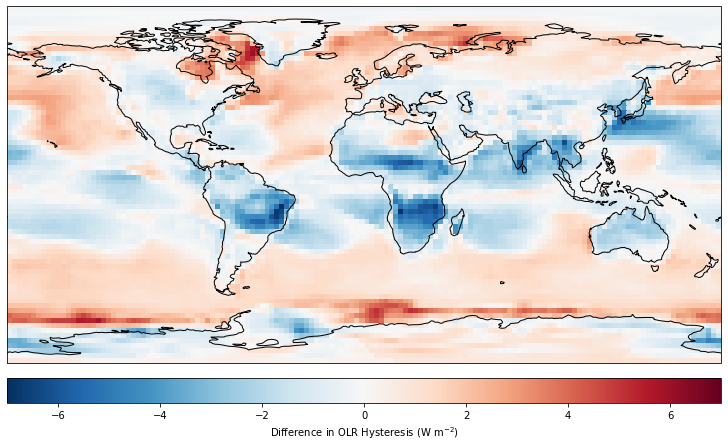

In [6]:
diferencemap = heights_meas.copy()

for i in range(len(heights_meas[:, 0])):
    for j in range(len(heights_meas[0, :])):
        diferencemap[i, j] = 0
        diferencemap[i, j] = heights_calc[i, j] - heights_meas[i, j]

widths = [1, 1]
fig = plt.figure(figsize=(10, 7), constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1)

ax2 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax2.coastlines()
C2 = ax2.pcolor(
    lon_long, lats, diferencemap, transform=ccrs.PlateCarree(), cmap=cm.RdBu_r
)
C2.set_clim(vmin=-7, vmax=7)
fig.colorbar(
    C2,
    ax=ax2,
    label="Difference in OLR Hysteresis (W m$^{-2}$)",
    fraction=0.3,
    orientation="horizontal",
)

path = "./Figures/"
# plt.savefig(path + 'Diff Hysteresis.png', bbox_inches='tight')

### All sky Hysteresis

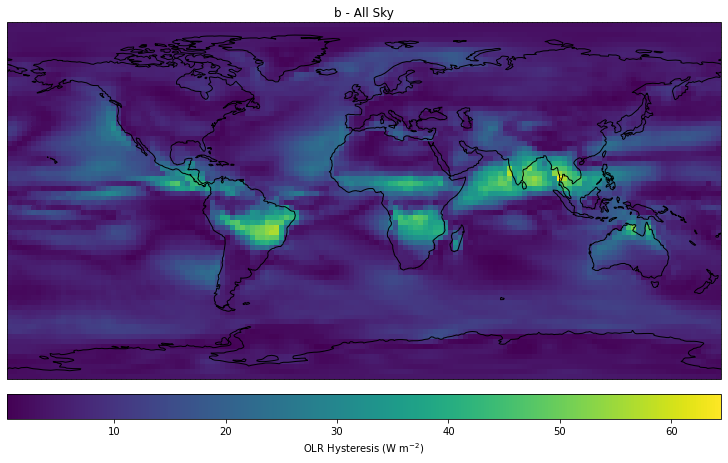

In [7]:
widths = [1]
fig = plt.figure(figsize=(10, 7), constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(
    lon_long, lats, heights_calc_allsky.height.values, transform=ccrs.PlateCarree()
)
ax1.set_title("b - All Sky")
fig.colorbar(
    C1,
    ax=ax1,
    label="OLR Hysteresis (W m$^{-2}$)",
    fraction=0.3,
    orientation="horizontal",
)

path = "./Figures/"
# plt.savefig(path + 'all sky hysteresis.png', bbox_inches='tight')

### Fractional All Sky

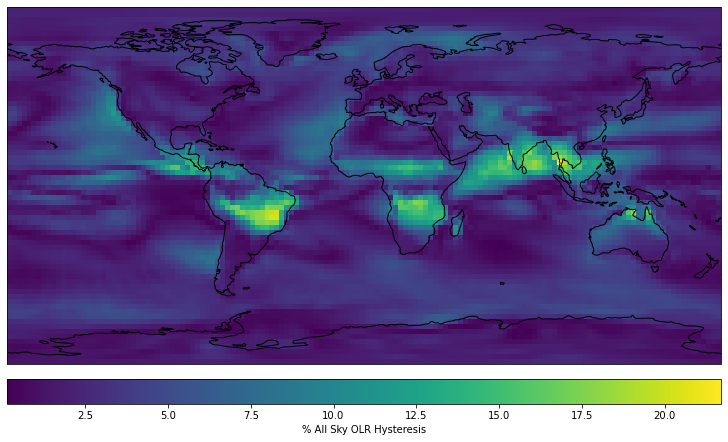

In [8]:
widths = [1]
fig = plt.figure(figsize=(10, 7), constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(lon_long, lats, heights_frac_allsky, transform=ccrs.PlateCarree())
fig.colorbar(
    C1, ax=ax1, label="% All Sky OLR Hysteresis", fraction=0.3, orientation="horizontal"
)

path = "./Figures/"
# plt.savefig(path + 'all sky hysteresis fractional.png', bbox_inches='tight')